### 比较不同hidden-size对结果的影响
#### 我们选择hidden-size=2,3,4,5来呈现结果
### 1.hidden-size=5（原结果）

In [9]:
model = LSTMRegression(input_size=1, hidden_size=5, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     #交叉熵BCEWithLogitsLoss()和MultiLabelSoftMarginLoss()
#criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.SGD(model.parameters(), lr=1e-1)

epochs = 100
batch_size = 30
batch = X_train.shape[0] // batch_size



torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=10,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, Acc:{np.mean(acc_ep):.4e}')


    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)



<timed exec>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch:     4, Loss: 4.1386e-01, Acc:8.2231e-01
Epoch:     9, Loss: 3.5046e-01, Acc:8.3867e-01
Epoch:    14, Loss: 3.2040e-01, Acc:8.5185e-01
Epoch:    19, Loss: 3.0330e-01, Acc:8.6359e-01
Epoch:    24, Loss: 2.7889e-01, Acc:8.8036e-01
Epoch:    29, Loss: 2.6983e-01, Acc:8.8631e-01
Epoch:    34, Loss: 2.4955e-01, Acc:9.0400e-01
Epoch:    39, Loss: 2.3753e-01, Acc:9.0979e-01
Epoch:    44, Loss: 2.4299e-01, Acc:9.0333e-01
Epoch:    49, Loss: 2.2056e-01, Acc:9.1518e-01
Epoch:    54, Loss: 2.4521e-01, Acc:8.9651e-01
Epoch:    59, Loss: 2.0899e-01, Acc:9.1785e-01
Epoch:    64, Loss: 2.4851e-01, Acc:9.0287e-01
Epoch:    69, Loss: 2.1502e-01, Acc:9.0656e-01
Epoch:    74, Loss: 2.0321e-01, Acc:9.1605e-01
Epoch:    79, Loss: 1.8932e-01, Acc:9.2205e-01
Epoch:    84, Loss: 1.7498e-01, Acc:9.3000e-01
Epoch:    89, Loss: 1.6229e-01, Acc:9.3513e-01
Epoch:    94, Loss: 1.5128e-01, Acc:9.3903e-01
Epoch:    99, Loss: 1.4276e-01, Acc:9.4497e-01
Wall time: 1h 44min 52s


In [10]:
# test
#X = X.reshape(-1,198,240)
#X = torch.from_numpy(X_valid)
Y_pred = model(X_valid)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)
#Y_pred = Y_pred.view(-1).data.numpy()

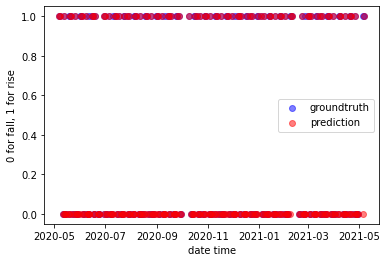

In [11]:
# visulize
kind = 2
series = np.arange(kind*len(index_valid),(kind+1)*len(index_valid))
Y_pred_re = Y_pred
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0


fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid, Y_valid[series], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid, Y_pred_re[series], alpha=0.5,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

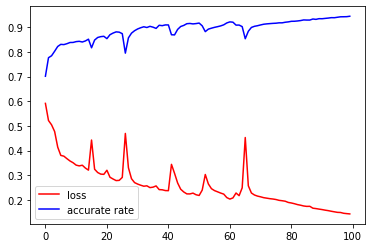

In [12]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

### 2.hidden-size=4

In [14]:
model = LSTMRegression(input_size=1, hidden_size=2, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
batch_size = 30
batch = X_train.shape[0] // batch_size



torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=10,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, Acc:{np.mean(acc_ep):.4e}')


    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)



<ipython-input-14-5e99bfb682c7>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))


Epoch:     4, Loss: 5.2984e-01, Acc:7.5579e-01
Epoch:     9, Loss: 5.1684e-01, Acc:7.6682e-01
Epoch:    14, Loss: 5.1257e-01, Acc:7.6974e-01
Epoch:    19, Loss: 5.0920e-01, Acc:7.7231e-01
Epoch:    24, Loss: 4.7836e-01, Acc:8.1128e-01
Epoch:    29, Loss: 4.4911e-01, Acc:8.1985e-01
Epoch:    34, Loss: 4.1738e-01, Acc:7.9590e-01
Epoch:    39, Loss: 3.9019e-01, Acc:8.0149e-01
Epoch:    44, Loss: 3.7664e-01, Acc:8.0897e-01
Epoch:    49, Loss: 3.6759e-01, Acc:8.1467e-01
Epoch:    54, Loss: 3.6225e-01, Acc:8.1554e-01
Epoch:    59, Loss: 3.5823e-01, Acc:8.1795e-01
Epoch:    64, Loss: 3.7886e-01, Acc:8.1426e-01
Epoch:    69, Loss: 3.6588e-01, Acc:8.1482e-01
Epoch:    74, Loss: 3.5698e-01, Acc:8.1718e-01
Epoch:    79, Loss: 3.5937e-01, Acc:8.1636e-01
Epoch:    84, Loss: 3.6129e-01, Acc:8.1574e-01
Epoch:    89, Loss: 3.7410e-01, Acc:8.1200e-01
Epoch:    94, Loss: 6.4523e-01, Acc:6.6159e-01
Epoch:    99, Loss: 3.5755e-01, Acc:8.1528e-01


In [16]:
Y_pred = model(X_valid)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

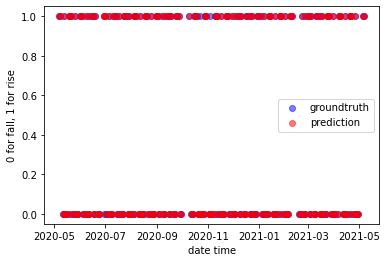

In [17]:
kind = 2
series = np.arange(kind*len(index_valid),(kind+1)*len(index_valid))
Y_pred_re = Y_pred
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0


fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid, Y_valid[series], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid, Y_pred_re[series], alpha=0.5,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

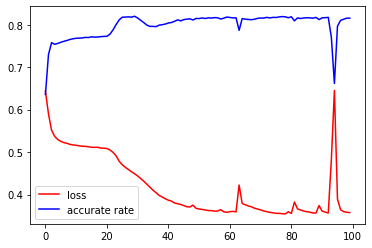

In [18]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

### hidden-size=3

In [19]:
model = LSTMRegression(input_size=1, hidden_size=3, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
batch_size = 30
batch = X_train.shape[0] // batch_size



torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=10,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, Acc:{np.mean(acc_ep):.4e}')


    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)



<ipython-input-19-6c441f698cd5>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))


Epoch:     4, Loss: 4.6483e-01, Acc:8.1528e-01
Epoch:     9, Loss: 4.2289e-01, Acc:8.0631e-01
Epoch:    14, Loss: 3.9955e-01, Acc:8.1928e-01
Epoch:    19, Loss: 8.1685e-01, Acc:5.4908e-01
Epoch:    24, Loss: 6.7729e-01, Acc:6.1908e-01
Epoch:    29, Loss: 6.6319e-01, Acc:6.1933e-01
Epoch:    34, Loss: 6.6163e-01, Acc:6.1856e-01
Epoch:    39, Loss: 6.5866e-01, Acc:6.1856e-01
Epoch:    44, Loss: 5.9450e-01, Acc:6.8410e-01
Epoch:    49, Loss: 5.3842e-01, Acc:7.7010e-01
Epoch:    54, Loss: 5.2882e-01, Acc:7.7564e-01
Epoch:    59, Loss: 5.2716e-01, Acc:7.7677e-01
Epoch:    64, Loss: 5.2177e-01, Acc:7.7908e-01
Epoch:    69, Loss: 5.0287e-01, Acc:7.9344e-01
Epoch:    74, Loss: 4.7941e-01, Acc:8.0246e-01
Epoch:    79, Loss: 4.4054e-01, Acc:8.1944e-01
Epoch:    84, Loss: 4.1958e-01, Acc:8.2697e-01
Epoch:    89, Loss: 4.0920e-01, Acc:8.2821e-01
Epoch:    94, Loss: 3.9157e-01, Acc:8.2821e-01
Epoch:    99, Loss: 4.5036e-01, Acc:8.1908e-01


In [20]:
Y_pred = model(X_valid)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

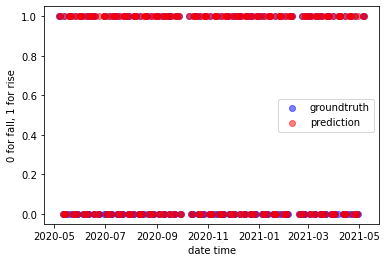

In [21]:
kind = 2
series = np.arange(kind*len(index_valid),(kind+1)*len(index_valid))
Y_pred_re = Y_pred
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0


fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid, Y_valid[series], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid, Y_pred_re[series], alpha=0.5,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

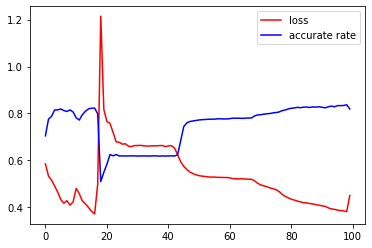

In [22]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

### hidden-size=4

In [23]:
model = LSTMRegression(input_size=1, hidden_size=4, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
batch_size = 30
batch = X_train.shape[0] // batch_size



torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=10,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, Acc:{np.mean(acc_ep):.4e}')


    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)



<ipython-input-23-5c446dd98473>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))


Epoch:     4, Loss: 4.8272e-01, Acc:7.9682e-01
Epoch:     9, Loss: 4.4589e-01, Acc:8.0836e-01
Epoch:    14, Loss: 4.1896e-01, Acc:8.0918e-01
Epoch:    19, Loss: 3.9287e-01, Acc:8.2297e-01
Epoch:    24, Loss: 3.9931e-01, Acc:8.1969e-01
Epoch:    29, Loss: 4.5538e-01, Acc:8.1595e-01
Epoch:    34, Loss: 3.5700e-01, Acc:8.3544e-01
Epoch:    39, Loss: 3.4787e-01, Acc:8.4246e-01
Epoch:    44, Loss: 4.7600e-01, Acc:7.7410e-01
Epoch:    49, Loss: 4.1438e-01, Acc:8.2256e-01
Epoch:    54, Loss: 3.6858e-01, Acc:8.2138e-01
Epoch:    59, Loss: 3.3956e-01, Acc:8.3744e-01
Epoch:    64, Loss: 3.4194e-01, Acc:8.4226e-01
Epoch:    69, Loss: 4.3176e-01, Acc:8.3190e-01
Epoch:    74, Loss: 4.5058e-01, Acc:7.9959e-01
Epoch:    79, Loss: 3.9772e-01, Acc:8.1590e-01
Epoch:    84, Loss: 3.8357e-01, Acc:8.2610e-01
Epoch:    89, Loss: 3.6893e-01, Acc:8.3503e-01
Epoch:    94, Loss: 4.9090e-01, Acc:8.0154e-01
Epoch:    99, Loss: 3.8718e-01, Acc:8.2877e-01


In [24]:
Y_pred = model(X_valid)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

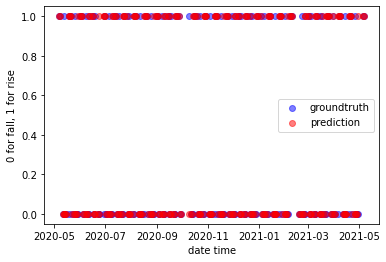

In [25]:
kind = 2
series = np.arange(kind*len(index_valid),(kind+1)*len(index_valid))
Y_pred_re = Y_pred
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0


fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid, Y_valid[series], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid, Y_pred_re[series], alpha=0.5,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

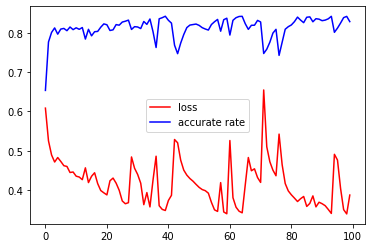

In [26]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

### 结论：可以看到隐藏层越多，预测的结果差异并不大，但是损失函数下降梯度有着显著差异